<a href="https://colab.research.google.com/github/Ishanvi-092/ML---Projects/blob/main/Facebook_Marketplace_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

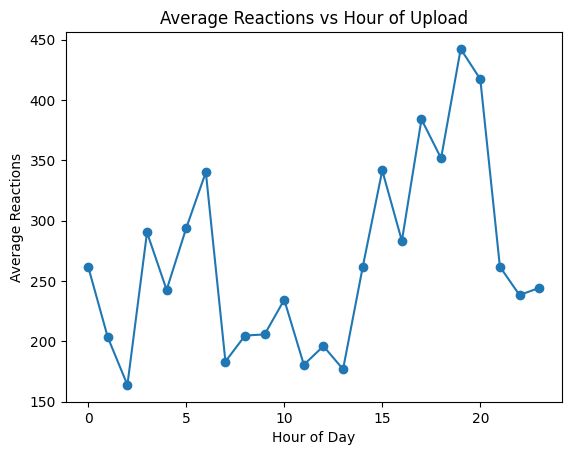


Correlation Matrix:
               num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments        0.150843      1.000000    0.640637
num_shares          0.250723      0.640637    1.000000


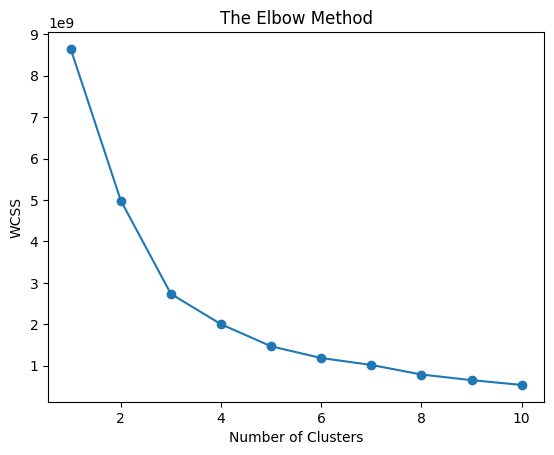


Cluster Counts:
Cluster
0    6429
2     484
1     137
Name: count, dtype: int64

Post Type Counts:
status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64

Average Engagement per Post Type:
             num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Importing dataset
dataset = pd.read_csv("Facebook_Marketplace_data.csv")

# Q1: Time of upload vs reactions
dataset["status_published"] = pd.to_datetime(dataset["status_published"])
dataset["hour"] = dataset["status_published"].dt.hour

avg_reactions = dataset.groupby("hour")["num_reactions"].mean()

plt.plot(avg_reactions.index, avg_reactions.values, marker="o")
plt.title("Average Reactions vs Hour of Upload")
plt.xlabel("Hour of Day")
plt.ylabel("Average Reactions")
plt.show()

# Q2: Correlation between reactions, comments, shares
print("\nCorrelation Matrix:")
print(dataset[["num_reactions", "num_comments", "num_shares"]].corr())

# Q3: K-Means clustering (Elbow method + clustering)
X = dataset[["num_reactions","num_comments","num_shares",
             "num_likes","num_loves","num_wows","num_hahas","num_sads","num_angrys"]].fillna(0).values

# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker="o")
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# Fit final model with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
dataset["Cluster"] = y_kmeans

print("\nCluster Counts:")
print(dataset["Cluster"].value_counts())

# Q4: Count of different types of posts
print("\nPost Type Counts:")
print(dataset["status_type"].value_counts())

# Q5: Average reactions, comments, shares by post type
print("\nAverage Engagement per Post Type:")
print(dataset.groupby("status_type")[["num_reactions","num_comments","num_shares"]].mean())
